In [28]:
#from google.colab import drive

In [29]:
#drive.mount('D:/MKCE-20220504T065310Z-001/0.MKCE/Datasets/Credit Card Customer Data.xlsx')

In [30]:
import pandas as pd
df=pd.read_excel('D:/MKCE-20220504T065310Z-001/0.MKCE/Datasets/Credit Card Customer Data.xlsx')

In [31]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [32]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [33]:
df.drop(['Sl_No','Customer Key'],inplace=True,axis=1)

In [34]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [35]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [37]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [38]:
from sklearn.cluster import KMeans
import sklearn

In [39]:
km=KMeans(n_clusters=4,random_state=42)

In [40]:
df['group or cluster']=km.fit_predict(df)

In [41]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group or cluster
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,3


In [42]:
df['group or cluster'].value_counts()

0    398
1    135
3     93
2     34
Name: group or cluster, dtype: int64

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

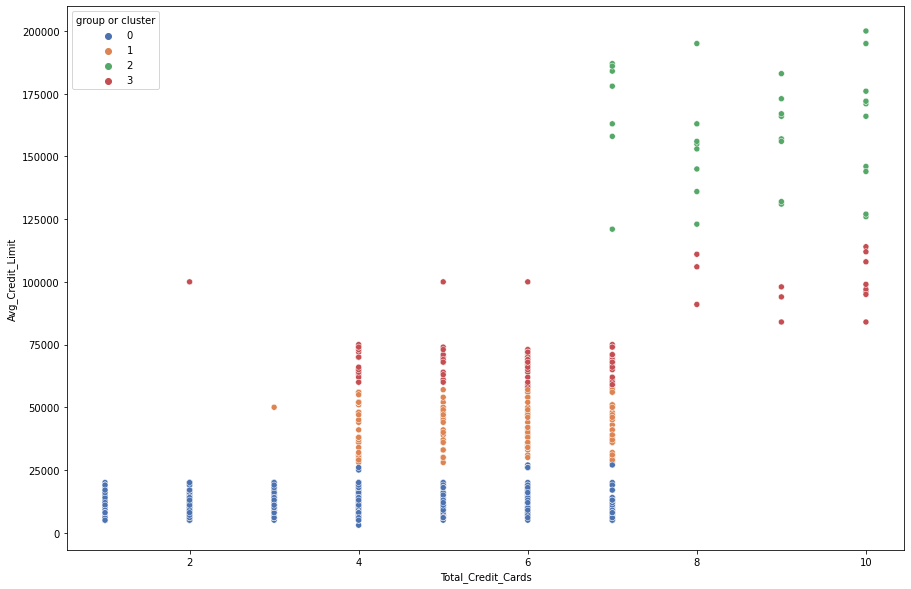

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=df['Total_Credit_Cards'],y=df['Avg_Credit_Limit'],hue=df['group or cluster'],palette='deep')

In [45]:
ss=[] # within cluster sum of squares (elbow method)

for i in range(1,7):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,tol=0.0001,verbose=0,random_state=None,copy_x=True,algorithm='auto')

  kmeans.fit(df)
  ss.append(kmeans.inertia_)



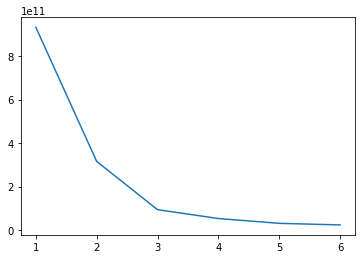

In [46]:
#elbow method
import matplotlib.pyplot as plt
plt.figsize=(15,10)
plt.plot(range(1,7),ss)


In [47]:
import sklearn.metrics as  met
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=200)

  kmeans.fit(df)
  labels=kmeans.labels_
  print("Silhouette score for K(cluster) = "+ str(i) +" is "+ str(met.silhouette_score(df,labels,metric='euclidean',sample_size=1000,random_state=200)))

Silhouette score for K(cluster) = 2 is 0.7701121350471558
Silhouette score for K(cluster) = 3 is 0.7187172253595538
Silhouette score for K(cluster) = 4 is 0.6987312619586853
Silhouette score for K(cluster) = 5 is 0.7085077085963472
Silhouette score for K(cluster) = 6 is 0.5994220975649395
Silhouette score for K(cluster) = 7 is 0.6223014215327288
Silhouette score for K(cluster) = 8 is 0.6177740963659605
Silhouette score for K(cluster) = 9 is 0.6198688589384581


In [48]:
#Kmeans 

km=KMeans(3)
km.fit(df)
df['group or cluster']=km.fit_predict(df)

In [49]:
fst_group=df[df['group or cluster']==0]
sec_group=df[df['group or cluster']==1]
thr_group=df[df['group or cluster']==2]

In [50]:
fst_group. to_csv("D:/MKCE-20220504T065310Z-001/First group.csv")
sec_group. to_csv("D:/MKCE-20220504T065310Z-001/Second group.csv")
thr_group. to_csv("D:/MKCE-20220504T065310Z-001/Third group.csv")

In [54]:
fst_group.to_excel("D:/MKCE-20220504T065310Z-001/First group1.xlsx")